In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.options.display.max_rows = 999
from IPython.display import display
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
import sklearn
import pickle
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
#import plotly.plotly as py
from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal
#import plotly 
#plotly.tools.set_credentials_file(username='Srinivas31286', api_key='DRdqteJGOM2cIpl40qf0')

In [2]:
dailyData=pd.read_csv('/Users/srinivasbs/Desktop/Srinivas/Quarter 6/DV/Final Project/divvy2017.csv')
dailyData.head(10)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,start_latitude,start_longitude,dpcapacity_start,to_station_id,to_station_name,end_latitude,end_longitude,dpcapacity_end
0,13518905,2017,3,13,4,23,Subscriber,Male,3/31/17 23:59,4/1/17 00:13,14.283333,37.9,cloudy,66,Clinton St & Lake St,41.885637,-87.641823,23,171,May St & Cullerton St,41.855136,-87.654127,11
1,13518904,2017,3,13,4,23,Subscriber,Male,3/31/17 23:56,4/1/17 00:00,3.933333,37.9,cloudy,199,Wabash Ave & Grand Ave,41.891466,-87.626761,15,26,McClurg Ct & Illinois St,41.890359,-87.617532,31
2,13518903,2017,3,13,4,23,Subscriber,Female,3/31/17 23:55,4/1/17 00:01,5.800000,37.9,cloudy,520,Greenview Ave & Jarvis Ave,42.015962,-87.668570,23,432,Clark St & Lunt Ave,42.009074,-87.674190,19
3,13518902,2017,3,13,4,23,Subscriber,Male,3/31/17 23:54,3/31/17 23:59,4.800000,37.9,cloudy,110,Dearborn St & Erie St,41.893992,-87.629318,23,142,McClurg Ct & Erie St,41.894503,-87.617854,31
4,13518901,2017,3,13,4,23,Subscriber,Female,3/31/17 23:53,4/1/17 00:00,6.916667,37.9,cloudy,327,Sheffield Ave & Webster Ave,41.921540,-87.653818,19,331,Halsted St & Blackhawk St (*),41.908537,-87.648627,20
5,13518900,2017,3,13,4,23,Subscriber,Male,3/31/17 23:51,3/31/17 23:55,4.033333,37.9,cloudy,143,Sedgwick St & Webster Ave,41.922167,-87.638888,15,289,Wells St & Concord Ln,41.912133,-87.634656,19
6,13518899,2017,3,13,4,23,Subscriber,Male,3/31/17 23:51,3/31/17 23:57,6.016667,37.9,cloudy,81,Daley Center Plaza,41.884241,-87.629634,39,41,Federal St & Polk St,41.872078,-87.629544,19
7,13518898,2017,3,13,4,23,Subscriber,Male,3/31/17 23:50,3/31/17 23:56,5.900000,37.9,cloudy,56,Desplaines St & Kinzie St,41.888716,-87.644448,27,77,Clinton St & Madison St,41.882242,-87.641066,31
8,13518897,2017,3,13,4,23,Subscriber,Male,3/31/17 23:50,3/31/17 23:55,4.983333,37.9,cloudy,210,Ashland Ave & Division St,41.903450,-87.667747,19,69,Damen Ave & Pierce Ave,41.909396,-87.677692,19
9,13518896,2017,3,13,4,23,Subscriber,Male,3/31/17 23:49,4/1/17 00:09,19.550000,37.9,cloudy,117,Wilton Ave & Belmont Ave,41.940180,-87.653040,23,29,Noble St & Milwaukee Ave,41.900680,-87.662600,15


In [3]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
trip_id              1048575 non-null int64
year                 1048575 non-null int64
month                1048575 non-null int64
week                 1048575 non-null int64
day                  1048575 non-null int64
hour                 1048575 non-null int64
usertype             1048575 non-null object
gender               1048575 non-null object
starttime            1048575 non-null object
stoptime             1048575 non-null object
tripduration         1048575 non-null float64
temperature          1048575 non-null float64
events               1048575 non-null object
from_station_id      1048575 non-null int64
from_station_name    1048575 non-null object
start_latitude       1048575 non-null float64
start_longitude      1048575 non-null float64
dpcapacity_start     1048575 non-null int64
to_station_id        1048575 non-null int64
to_station_name      1048575 non-null

In [4]:
#dailyData.from_station_id.count().groupby('from_station_id')
dailyData.groupby('from_station_name')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_name
Clinton St & Washington Blvd    18712
Clinton St & Madison St         15709
Canal St & Adams St             14928
Canal St & Madison St           12045
Kingsbury St & Kinzie St        11884
Canal St & Jackson Blvd         11592
Franklin St & Monroe St         10459
Columbus Dr & Randolph St       10121
Daley Center Plaza               9526
Michigan Ave & Washington St     9319
Name: trip_id, dtype: int64

In [5]:
dailyData.groupby('from_station_id')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_id
91     18712
77     15709
192    14928
174    12045
133    11884
75     11592
287    10459
195    10121
81      9526
43      9319
Name: trip_id, dtype: int64

In [6]:
#No null values in our data which is a good thing
dailyData.isnull().sum().sort_values(ascending=False)


dpcapacity_end       0
tripduration         0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
temperature          0
end_longitude        0
events               0
from_station_id      0
from_station_name    0
start_latitude       0
start_longitude      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
end_latitude         0
trip_id              0
dtype: int64

In [7]:
dailyData.shape

(1048575, 23)

In [8]:
dailyData['from_station_name'].nunique()

577

# Creating new dataframe with only top 10 stations data

In [9]:
Top_Daily_Data = dailyData[(dailyData.from_station_id == 91) | (dailyData.from_station_id == 77) |(dailyData.from_station_id == 192) |(dailyData.from_station_id == 174) |(dailyData.from_station_id == 133) |(dailyData.from_station_id == 75) | (dailyData.from_station_id == 287) |(dailyData.from_station_id == 195) |(dailyData.from_station_id == 81) | (dailyData.from_station_id == 43)]

In [10]:
Top_Daily_Data.groupby('from_station_id')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_id
91     18712
77     15709
192    14928
174    12045
133    11884
75     11592
287    10459
195    10121
81      9526
43      9319
Name: trip_id, dtype: int64

In [11]:
Top_Daily_Data['from_station_name'].unique()

array(['Daley Center Plaza', 'Clinton St & Madison St',
       'Clinton St & Washington Blvd', 'Canal St & Jackson Blvd',
       'Michigan Ave & Washington St', 'Canal St & Madison St',
       'Kingsbury St & Kinzie St', 'Canal St & Adams St',
       'Columbus Dr & Randolph St', 'Franklin St & Monroe St'],
      dtype=object)

In [12]:
#df.from_station_name
pd.crosstab(Top_Daily_Data['from_station_name'], Top_Daily_Data['to_station_name'], margins=True)


to_station_name,900 W Harrison St,Aberdeen St & Jackson Blvd,Aberdeen St & Monroe St,Ada St & Washington Blvd,Adler Planetarium,Albany Ave & Bloomingdale Ave,Artesian Ave & Hubbard St,Ashland Ave & 13th St,Ashland Ave & 21st St,Ashland Ave & Augusta Blvd,Ashland Ave & Belle Plaine Ave,Ashland Ave & Blackhawk St,Ashland Ave & Chicago Ave,Ashland Ave & Division St,Ashland Ave & Grace St,Ashland Ave & Grand Ave,Ashland Ave & Harrison St,Ashland Ave & Lake St,Ashland Ave & Wellington Ave,Ashland Ave & Wrightwood Ave,Avondale Ave & Irving Park Rd,Bissell St & Armitage Ave,Blue Island Ave & 18th St,Broadway & Argyle St,Broadway & Barry Ave,...,Wells St & Concord Ln,Wells St & Elm St,Wells St & Evergreen Ave,Wells St & Huron St,Wells St & Polk St,Wells St & Walton St,Wentworth Ave & 24th St,Wentworth Ave & 33rd St,Wentworth Ave & 35th St,Wentworth Ave & Archer Ave,Western Ave & Congress Pkwy,Western Ave & Division St,Western Ave & Leland Ave,Western Ave & Monroe St,Western Ave & Walton St,Western Ave & Winnebago Ave,Wilton Ave & Belmont Ave,Wilton Ave & Diversey Pkwy,Winchester Ave & Elston Ave,Wolcott Ave & Polk St,Wood St & Hubbard St,Wood St & Milwaukee Ave,Wood St & Taylor St,Woodlawn Ave & 55th St,All
from_station_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canal St & Adams St,16,174,184,45,6,0,11,2,2,102,0,8,41,28,0,42,11,13,0,2,0,7,13,0,2,...,18,48,15,153,66,13,5,0,2,7,0,38,0,1,17,1,2,6,5,111,8,31,96,1,14928
Canal St & Jackson Blvd,102,186,89,27,2,0,3,1,3,12,0,4,18,71,0,34,24,17,0,15,0,1,15,0,2,...,20,47,5,124,116,12,8,1,4,13,0,1,0,1,19,9,0,0,4,145,1,21,310,0,11592
Canal St & Madison St,6,24,75,100,25,0,61,0,0,42,0,5,35,40,0,34,4,8,2,1,0,25,3,0,1,...,30,175,95,134,56,52,0,0,0,3,0,1,0,1,2,6,22,10,5,6,14,69,0,0,12045
Clinton St & Madison St,64,106,171,136,1,1,8,9,3,22,0,24,55,43,1,77,105,19,1,5,1,10,23,0,4,...,59,66,59,143,63,15,2,0,0,36,1,15,1,1,29,9,29,10,16,178,61,86,68,0,15709
Clinton St & Washington Blvd,9,182,87,161,5,1,16,0,1,50,1,7,40,34,0,41,91,35,0,5,0,11,8,0,2,...,75,148,60,397,17,64,0,1,0,13,2,8,0,0,5,12,4,4,1,238,27,42,38,0,18712
Columbus Dr & Randolph St,1,2,24,8,34,0,0,0,0,0,0,0,1,5,1,3,0,4,0,2,0,2,4,0,4,...,23,9,8,14,42,3,0,0,1,2,0,0,0,0,4,1,0,3,0,0,3,19,3,0,10121
Daley Center Plaza,2,15,38,19,7,0,1,0,4,19,0,37,24,44,0,10,4,7,4,0,0,7,5,2,24,...,58,27,35,32,122,11,0,0,0,5,0,34,0,1,3,9,32,5,2,2,23,32,2,0,9526
Franklin St & Monroe St,1,44,162,46,0,8,1,3,0,22,0,10,20,16,3,9,3,29,0,2,0,32,11,1,3,...,131,76,78,72,59,14,1,0,0,7,2,12,0,4,6,3,6,29,1,0,12,31,0,0,10459
Kingsbury St & Kinzie St,2,25,110,40,4,1,1,0,0,21,1,41,58,66,2,39,2,26,7,4,0,49,6,0,4,...,79,100,36,80,13,17,0,0,0,2,1,8,1,6,16,34,2,0,1,10,23,61,4,0,11884


# Lets visualize the data we have

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


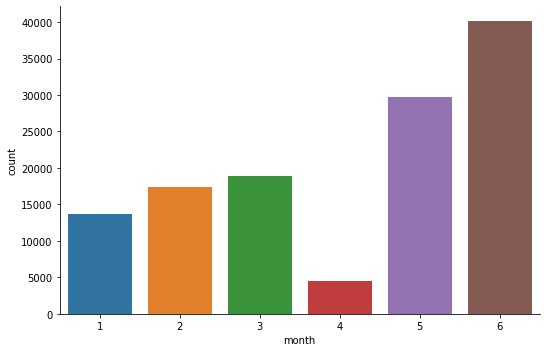

In [13]:
#June month has the maximum usage , which can be linked to the summer season increasing number of bike users
sns.factorplot(x='month',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


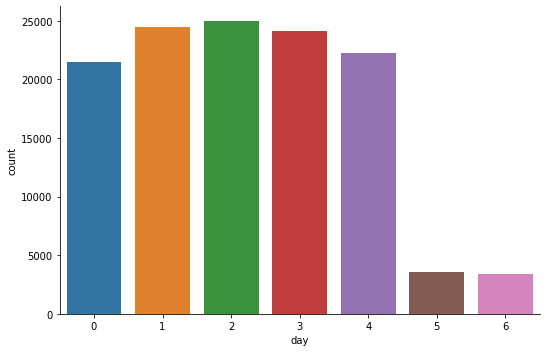

In [14]:
#Weekday bicycle usage is higher compared to weekends
sns.factorplot(x='day',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


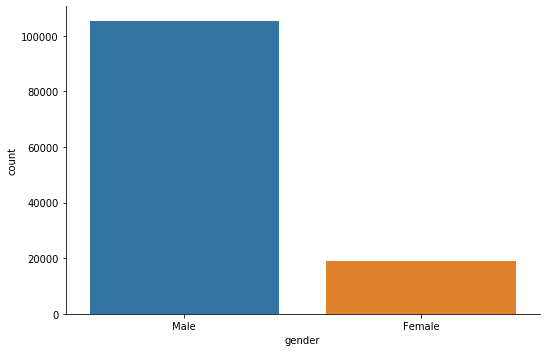

In [15]:
#Significantly more male users
sns.factorplot(x='gender',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


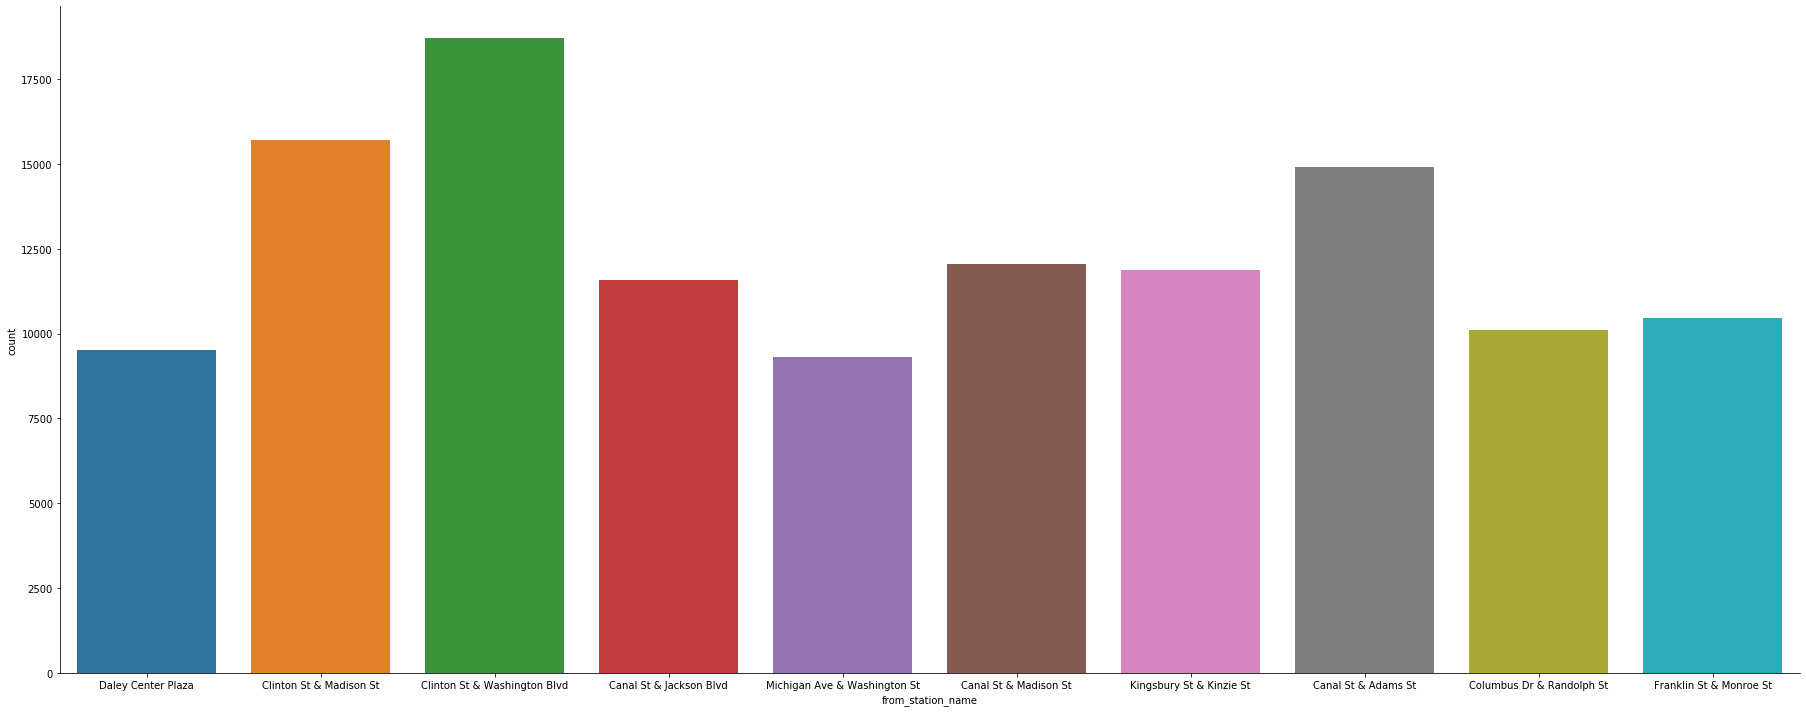

In [16]:
 sns.factorplot(x='from_station_name',data=Top_Daily_Data,kind='count',size=10,aspect=2.5)


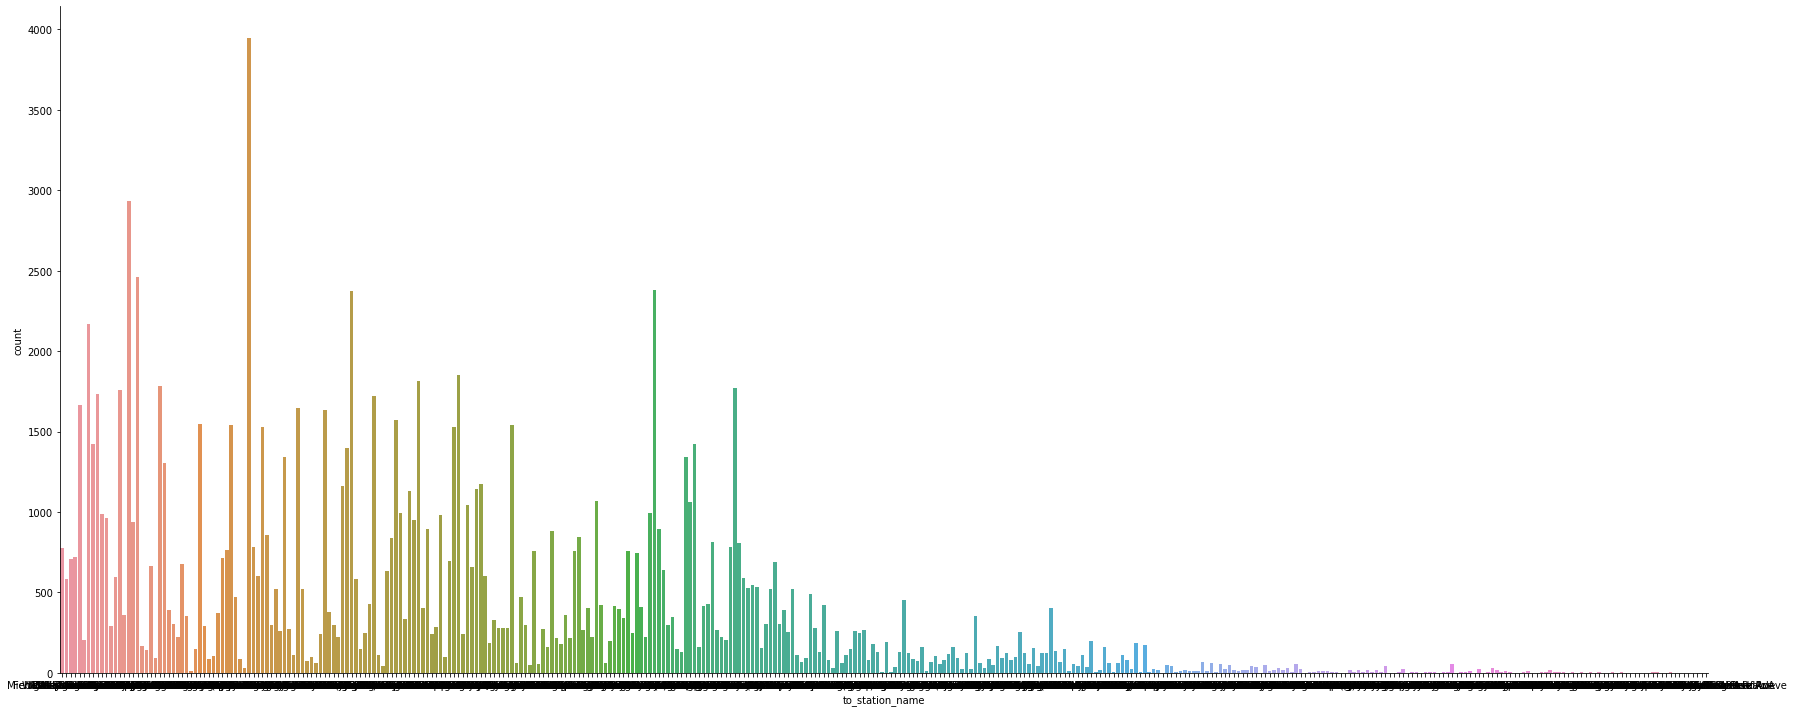

In [17]:
 sns.factorplot(x='to_station_name',data=Top_Daily_Data,kind='count',size=10,aspect=2.5)


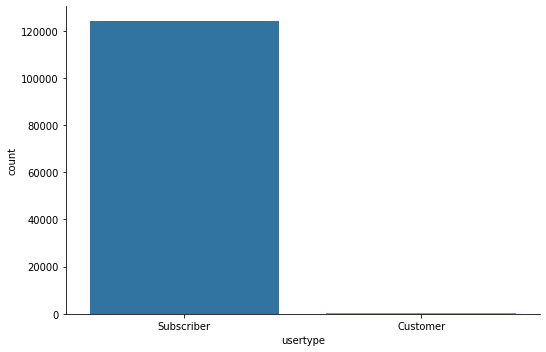

In [18]:
#Negligible number of non subscribers
sns.factorplot(x='usertype',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


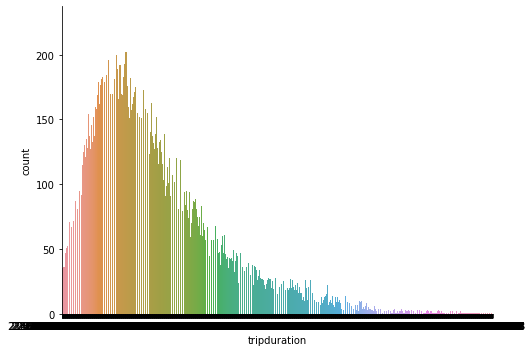

In [19]:
sns.factorplot(x='tripduration',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


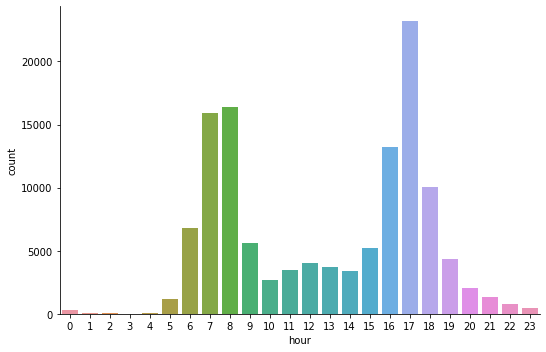

In [20]:
#Morning and evening peak hours of bicycle usage, which could be office goers
sns.factorplot(x='hour',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


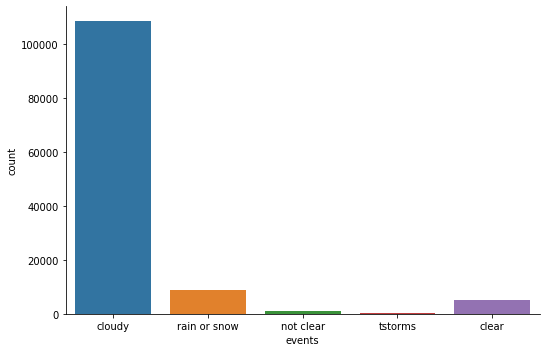

In [21]:
#People prefer to ride bicylce mostly during cloudy weather 
sns.factorplot(x='events',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


In [22]:
Top_Daily_Data.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,start_latitude,start_longitude,dpcapacity_start,to_station_id,to_station_name,end_latitude,end_longitude,dpcapacity_end
6,13518899,2017,3,13,4,23,Subscriber,Male,3/31/17 23:51,3/31/17 23:57,6.016667,37.9,cloudy,81,Daley Center Plaza,41.884241,-87.629634,39,41,Federal St & Polk St,41.872078,-87.629544,19
16,13518889,2017,3,13,4,23,Subscriber,Female,3/31/17 23:45,3/31/17 23:52,7.450000,37.9,cloudy,77,Clinton St & Madison St,41.882242,-87.641066,31,175,Wells St & Polk St,41.872596,-87.633502,19
19,13518886,2017,3,13,4,23,Subscriber,Male,3/31/17 23:43,3/31/17 23:58,14.716667,37.9,cloudy,91,Clinton St & Washington Blvd,41.883380,-87.641170,31,182,Wells St & Elm St,41.903222,-87.634324,23
23,13518882,2017,3,13,4,23,Subscriber,Male,3/31/17 23:34,3/31/17 23:44,10.283333,37.9,cloudy,75,Canal St & Jackson Blvd,41.877245,-87.639366,31,197,Michigan Ave & Madison St,41.882134,-87.625125,19
44,13518859,2017,3,13,4,23,Subscriber,Male,3/31/17 23:11,3/31/17 23:13,2.166667,37.9,cloudy,43,Michigan Ave & Washington St,41.883893,-87.624649,43,81,Daley Center Plaza,41.884241,-87.629634,39


In [23]:
Top_Daily_Data.temperature.unique()
Top_Daily_Data.events.unique()
#Top_Daily_Data.to_station_name.unique()
#Top_Daily_Data.groupby('to_station_name')['trip_id'].count().sort_values(ascending=False)#.head(10)

array(['cloudy', 'rain or snow', 'not clear', 'tstorms', 'clear'],
      dtype=object)

#New column to be created to display weekday/weekend
#User type can be imputed to 0 as Customer and 1 as Subscriber
#Gender type can be imputed to 0 as female and 1 as Male


In [24]:
Top_Daily_Data = Top_Daily_Data.drop(['trip_id'], axis = 1)


In [25]:
Top_Daily_Data.head()

,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,start_latitude,start_longitude,dpcapacity_start,to_station_id,to_station_name,end_latitude,end_longitude,dpcapacity_end
6,2017,3,13,4,23,Subscriber,Male,3/31/17 23:51,3/31/17 23:57,6.016667,37.9,cloudy,81,Daley Center Plaza,41.884241,-87.629634,39,41,Federal St & Polk St,41.872078,-87.629544,19
16,2017,3,13,4,23,Subscriber,Female,3/31/17 23:45,3/31/17 23:52,7.450000,37.9,cloudy,77,Clinton St & Madison St,41.882242,-87.641066,31,175,Wells St & Polk St,41.872596,-87.633502,19
19,2017,3,13,4,23,Subscriber,Male,3/31/17 23:43,3/31/17 23:58,14.716667,37.9,cloudy,91,Clinton St & Washington Blvd,41.883380,-87.641170,31,182,Wells St & Elm St,41.903222,-87.634324,23
23,2017,3,13,4,23,Subscriber,Male,3/31/17 23:34,3/31/17 23:44,10.283333,37.9,cloudy,75,Canal St & Jackson Blvd,41.877245,-87.639366,31,197,Michigan Ave & Madison St,41.882134,-87.625125,19
44,2017,3,13,4,23,Subscriber,Male,3/31/17 23:11,3/31/17 23:13,2.166667,37.9,cloudy,43,Michigan Ave & Washington St,41.883893,-87.624649,43,81,Daley Center Plaza,41.884241,-87.629634,39


In [26]:
#Calculating distance from the lattitudes and longitudes

s_lat=41.884241
s_lng=-87.629634
e_lat=41.872078
e_lng=-87.629544
s_lat = s_lat*np.pi/180.0                      
s_lng = np.deg2rad(s_lng)     
e_lat = np.deg2rad(e_lat)                       
e_lng = np.deg2rad(e_lng)
R = 6373.0
d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
d=2 * R * np.arcsin(np.sqrt(d))
d=d*0.62137
#return distance_miles

print("Result:", d)

Result: 0.8406570615566726


In [27]:
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [28]:
Top_Daily_Data['distance_miles']=distance(Top_Daily_Data.start_latitude,Top_Daily_Data.start_longitude,Top_Daily_Data.end_latitude,Top_Daily_Data.end_longitude)

In [29]:
Top_Daily_Data['distance_miles']=Top_Daily_Data['distance_miles']*0.62137

In [30]:
Top_Daily_Data.head()

,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,start_latitude,start_longitude,dpcapacity_start,to_station_id,to_station_name,end_latitude,end_longitude,dpcapacity_end,distance_miles
6,2017,3,13,4,23,Subscriber,Male,3/31/17 23:51,3/31/17 23:57,6.016667,37.9,cloudy,81,Daley Center Plaza,41.884241,-87.629634,39,41,Federal St & Polk St,41.872078,-87.629544,19,0.840683
16,2017,3,13,4,23,Subscriber,Female,3/31/17 23:45,3/31/17 23:52,7.450000,37.9,cloudy,77,Clinton St & Madison St,41.882242,-87.641066,31,175,Wells St & Polk St,41.872596,-87.633502,19,0.771999
19,2017,3,13,4,23,Subscriber,Male,3/31/17 23:43,3/31/17 23:58,14.716667,37.9,cloudy,91,Clinton St & Washington Blvd,41.883380,-87.641170,31,182,Wells St & Elm St,41.903222,-87.634324,23,1.415886
23,2017,3,13,4,23,Subscriber,Male,3/31/17 23:34,3/31/17 23:44,10.283333,37.9,cloudy,75,Canal St & Jackson Blvd,41.877245,-87.639366,31,197,Michigan Ave & Madison St,41.882134,-87.625125,19,0.806983
44,2017,3,13,4,23,Subscriber,Male,3/31/17 23:11,3/31/17 23:13,2.166667,37.9,cloudy,43,Michigan Ave & Washington St,41.883893,-87.624649,43,81,Daley Center Plaza,41.884241,-87.629634,39,0.257627


In [31]:
#convert time to day or night: if hour>=18 and <=6 then its night, hence column named "morning" is 0 else 1
def morning(data):
    if (data['hour']>=18) or (data['hour']<=6):
        morning=0
    else: morning=1
    return morning

In [32]:
Top_Daily_Data['morning']=Top_Daily_Data.apply(morning,axis=1)

In [33]:
Top_Daily_Data['morning'].value_counts()

1    96795
0    27500
Name: morning, dtype: int64

In [34]:
#value counts of month
Top_Daily_Data['month'].value_counts()

6    40137
5    29780
3    18862
2    17352
1    13723
4     4441
Name: month, dtype: int64

In [35]:
#convert months 1,2,3,4 to 0 and 5,6 to 1. 1 indicates summer, 0 non summer (winter, spring)
def season(data):
    if (data['month']==5) or (data['month']==6):
        season=1
    else: season=0
    return season

In [36]:
Top_Daily_Data['season']=Top_Daily_Data.apply(season,axis=1)

In [37]:
Top_Daily_Data['season'].value_counts()

1    69917
0    54378
Name: season, dtype: int64

In [38]:
Top_Daily_Data['day'].value_counts()

2    24979
1    24464
3    24168
4    22240
0    21445
5     3603
6     3396
Name: day, dtype: int64

In [39]:
#convert day 0,1,2,3,4 to 1 and 5,6 to 0. 1 indicates weekday, 0 weekend
def weekday(data):
    if (data['day']==5) or (data['day']==6):
        weekday=0
    else:weekday=1
    return weekday

In [40]:
Top_Daily_Data['weekday']=Top_Daily_Data.apply(weekday,axis=1)

In [41]:
Top_Daily_Data['weekday'].value_counts()

1    117296
0      6999
Name: weekday, dtype: int64

In [42]:
#convert hour to peak and non-peak, 6-9 AM and 4-7PM are peak
def peak(data):
    peak_hr=[6,7,8,9,16,17,18,19]
    if data['hour'] in peak_hr:
        peak=1
    else: peak=0
    return peak

In [43]:
Top_Daily_Data['peak']=Top_Daily_Data.apply(peak,axis=1)

In [44]:
Top_Daily_Data['peak'].value_counts()

1    95564
0    28731
Name: peak, dtype: int64

In [45]:
data_for_model=Top_Daily_Data[['usertype','gender','tripduration','temperature','events','from_station_id','to_station_id','distance_miles','morning','season','weekday','peak']]

In [46]:
data_for_model.head()

,usertype,gender,tripduration,temperature,events,from_station_id,to_station_id,distance_miles,morning,season,weekday,peak
6,Subscriber,Male,6.016667,37.9,cloudy,81,41,0.840683,0,0,1,0
16,Subscriber,Female,7.450000,37.9,cloudy,77,175,0.771999,0,0,1,0
19,Subscriber,Male,14.716667,37.9,cloudy,91,182,1.415886,0,0,1,0
23,Subscriber,Male,10.283333,37.9,cloudy,75,197,0.806983,0,0,1,0
44,Subscriber,Male,2.166667,37.9,cloudy,43,81,0.257627,0,0,1,0


In [47]:
#calculate average distance for each start station 
avg_dist=data_for_model.groupby('from_station_id',as_index=False)['distance_miles'].mean()
avg_dist=pd.DataFrame(avg_dist)
avg_dist.columns=['from_station_id','avg_dist']
avg_dist

,from_station_id,avg_dist
0,43,0.998779
1,75,1.081266
2,77,1.061612
3,81,1.223453
4,91,1.052817
5,133,0.921209
6,174,1.114798
7,192,1.167511
8,195,1.070397
9,287,1.262959


In [48]:
#create a new dataframe which has the average distance travelled from each start station
data_for_model2=pd.merge(data_for_model, avg_dist, how='left', on='from_station_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)

In [49]:
data_for_model2.head()

,usertype,gender,tripduration,temperature,events,from_station_id,to_station_id,distance_miles,morning,season,weekday,peak,avg_dist
0,Subscriber,Male,2.166667,37.9,cloudy,43,81,0.257627,0,0,1,0,0.998779
1,Subscriber,Female,20.700000,41.0,cloudy,43,202,2.136992,0,0,1,1,0.998779
2,Subscriber,Male,7.433333,42.1,cloudy,43,91,0.850839,0,0,1,1,0.998779
3,Subscriber,Female,17.650000,42.1,cloudy,43,273,1.802507,0,0,1,1,0.998779
4,Subscriber,Male,9.083333,42.1,cloudy,43,91,0.850839,0,0,1,1,0.998779


In [50]:
data_for_model2['avg_dist'].isnull().sum()

0

In [51]:
#create dummies for factor variables
usertype=pd.get_dummies(data_for_model2['usertype'],drop_first=True)
gender=pd.get_dummies(data_for_model2['gender'],drop_first=True)
events=pd.get_dummies(data_for_model2['events'],drop_first=True)
start_stations=pd.get_dummies(data_for_model2['from_station_id'],drop_first=True)
peak=pd.get_dummies(data_for_model2['peak'],drop_first=True)

In [52]:
#new data frame with dummies
data_for_model_dummies=pd.concat([data_for_model2,usertype,gender,events],axis=1)
data_for_model_dummies=pd.concat([data_for_model_dummies,start_stations],axis=1)
data_for_model_dummies=pd.concat([data_for_model_dummies,peak],axis=1)

In [53]:
data_for_model_dummies.drop(['usertype','gender','events'],axis=1,inplace=True)
data_for_model_dummies.drop(['from_station_id'],axis=1,inplace=True)

In [54]:
data_for_model_dummies.head()

,tripduration,temperature,to_station_id,distance_miles,morning,season,weekday,peak,avg_dist,Subscriber,Male,cloudy,not clear,rain or snow,tstorms,75,77,81,91,133,174,192,195,287,1
0,2.166667,37.9,81,0.257627,0,0,1,0,0.998779,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20.700000,41.0,202,2.136992,0,0,1,1,0.998779,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.433333,42.1,91,0.850839,0,0,1,1,0.998779,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,17.650000,42.1,273,1.802507,0,0,1,1,0.998779,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.083333,42.1,91,0.850839,0,0,1,1,0.998779,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
data_for_model_dummies['to_station_id']=data_for_model_dummies['to_station_id'].astype(str)

In [56]:
data_for_model_dummies.columns

Index([  'tripduration',    'temperature',  'to_station_id', 'distance_miles',
              'morning',         'season',        'weekday',           'peak',
             'avg_dist',     'Subscriber',           'Male',         'cloudy',
            'not clear',   'rain or snow',        'tstorms',               75,
                     77,               81,               91,              133,
                    174,              192,              195,              287,
                      1],
      dtype='object')

In [57]:
#scale the data
X=data_for_model_dummies[['tripduration',    'temperature',  'distance_miles',
              'morning',         'season',        'weekday',           'peak',
             'avg_dist',     'Subscriber',           'Male',         'cloudy',
            'not clear',   'rain or snow',        'tstorms',               75,
                     77,               81,               91,              133,
                    174,              192,              195,              287]]
y=data_for_model_dummies['to_station_id']

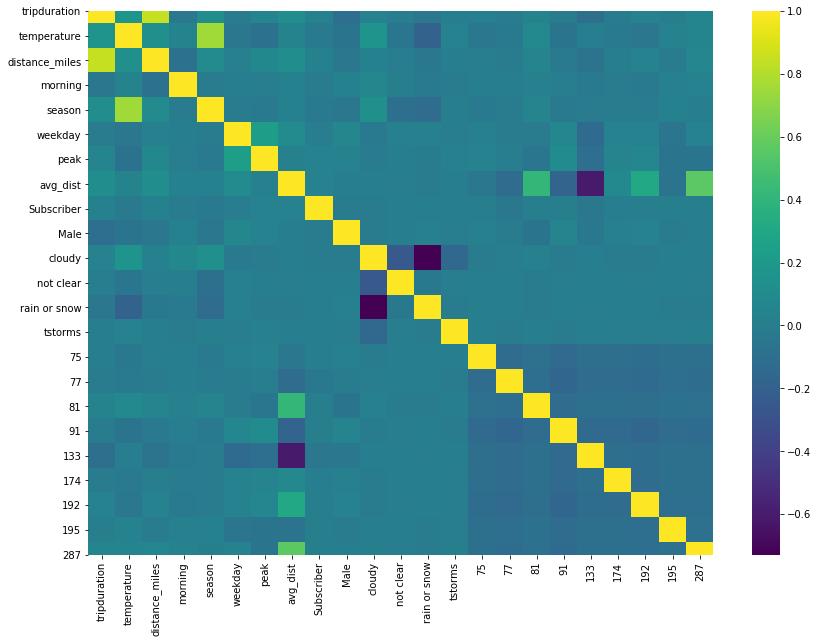

In [58]:
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(),cmap='viridis')

In [59]:
X.corr()

,tripduration,temperature,distance_miles,morning,season,weekday,peak,avg_dist,Subscriber,Male,cloudy,not clear,rain or snow,tstorms,75,77,81,91,133,174,192,195,287
tripduration,1.000000,0.167985,0.850998,-0.037286,0.119693,-0.018098,0.057067,0.121796,0.027496,-0.110361,0.031688,-0.004480,-0.040476,0.001004,0.007509,-0.010482,0.047954,-0.014331,-0.104195,-0.011907,0.039557,0.009139,0.058171
temperature,0.167985,1.000000,0.135877,0.042482,0.753908,-0.043416,-0.084056,0.046066,-0.021503,-0.060519,0.168777,-0.047604,-0.190823,0.029887,-0.035288,-0.021257,0.085053,-0.062737,0.005824,-0.021690,-0.042635,0.040208,0.055338
distance_miles,0.850998,0.135877,1.000000,-0.082544,0.089723,0.015926,0.075797,0.119354,0.025218,-0.044941,0.021819,-0.001178,-0.034807,0.002526,-0.004462,-0.015052,0.049478,-0.021494,-0.072473,0.009785,0.036464,-0.008367,0.067692
morning,-0.037286,0.042482,-0.082544,1.000000,-0.013129,0.006095,-0.004721,0.026492,-0.016569,0.024366,0.069689,0.010418,-0.023852,-0.009987,0.004179,0.005867,0.015345,-0.001898,-0.022127,-0.019070,-0.025114,0.018231,0.033934
season,0.119693,0.753908,0.089723,-0.013129,1.000000,-0.015408,-0.022681,0.027865,-0.021520,-0.042333,0.129252,-0.097066,-0.124480,0.010459,-0.021282,-0.011784,0.049903,-0.021980,-0.010581,-0.014660,-0.009735,0.027803,0.013596
weekday,-0.018098,-0.043416,0.015926,0.006095,-0.015408,1.000000,0.227600,0.091183,-0.003988,0.069109,-0.023186,0.019292,0.018644,0.000628,0.016771,-0.016641,-0.011623,0.067895,-0.129230,0.031529,0.041076,-0.058969,0.034566
peak,0.057067,-0.084056,0.075797,-0.004721,-0.022681,0.227600,1.000000,0.017983,0.039436,0.029051,-0.011775,0.009883,-0.007106,0.016176,0.030025,-0.000163,-0.049433,0.098052,-0.111563,0.051881,0.063910,-0.061722,-0.063204
avg_dist,0.121796,0.046066,0.119354,0.026492,0.027865,0.091183,0.017983,1.000000,0.034427,0.002989,0.010728,-0.003804,-0.011543,0.002932,-0.037381,-0.126109,0.414552,-0.180086,-0.607214,0.081984,0.305511,-0.070102,0.567158
Subscriber,0.027496,-0.021503,0.025218,-0.016569,-0.021520,-0.003988,0.039436,0.034427,1.000000,-0.013462,-0.008322,0.003453,0.004764,0.002076,0.009285,-0.033237,0.010408,0.013337,-0.042096,0.006557,0.013347,0.009940,0.008540
Male,-0.110361,-0.060519,-0.044941,0.024366,-0.042333,0.069109,0.029051,0.002989,-0.013462,1.000000,-0.010708,0.005562,0.015987,-0.001812,0.014430,-0.016283,-0.064572,0.053580,-0.035617,0.020848,0.029959,-0.008248,0.001108


In [60]:
#tripduration:distance, season:temperature, cloudy:rain or snow, are highly correlated, keeping one of those

In [61]:
#original variables
#X=data_for_model_dummies[[    'temperature', 'distance_miles',
 #             'morning',         'season',        'weekday',     'Subscriber',
  #               'Male',         'cloudy',               75,               77,               81,
   #                  91,              133,              174,              192,
    #                195,              287]]

In [62]:
X=data_for_model_dummies[[ 'temperature', 'distance_miles',
              'weekday',           'peak',
            'Subscriber',           'Male',
            75,
                     77,               81,               91,              133,
                    174,              192,              195,              287]]
y=data_for_model_dummies['to_station_id']

In [63]:
scaler=StandardScaler()

In [64]:
X_scaled=scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=100,test_size=0.3)

# Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
#fit model on train data
rf_mod2=rf.fit(X_train,y_train)
#predict on train data
pred_train=rf_mod2.predict(X_train)






/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train, pred_train)
print("Train error:{}".format(mse_train))
#fit model and predict on test data
#rf_mod2=rf.fit(X_train,y_train)
pred_test=rf_mod2.predict(X_test)

Train error:191.6596096820909


In [69]:
mse_test=mean_squared_error(y_test, pred_test)
print("Test error:{}".format(mse_test))

Test error:5975.534527608678


In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,pred_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         100       0.88      0.90      0.89       491
         103       0.57      0.65      0.61       111
         106       0.69      0.79      0.74       293
         107       0.45      0.44      0.45        88
         108       0.77      0.64      0.70        75
         109       0.79      0.59      0.68        71
         110       0.78      0.88      0.83       550
         111       0.82      0.81      0.81       227
         112       0.76      0.73      0.75       329
         113       0.21      0.24      0.22        46
         114       0.50      0.50      0.50         2
         115       0.23      0.32      0.27        22
         116       0.25      0.24      0.24        25
         117       0.36      0.30      0.33        27
         118       0.44      0.63      0.52        84
         119       0.23      0.24      0.23        50
         120       0.22      0.17      0.19        35
         122       0.36    

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
acc_score_rf=accuracy_score(y_test,pred_test)
acc_score_rf

0.7271045080318592

In [74]:
rf_mod2.score(X_test,y_test)

0.7271045080318592

In [75]:
acc_random_forest = round(rf_mod2.score(X_test, y_test) * 100, 2)
acc_random_forest

72.71

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
Rf_MSE_CV_scores = - cross_val_score(rf_mod2, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
RF_RMSE_CV = (Rf_MSE_CV_scores.mean())**(1/2)
print('RF CV RMSE: {:.2f}'.format(RF_RMSE_CV))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


RF CV RMSE: 75.24


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
print (confusion_matrix(y_test,pred_test))

[[443   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   1]
 [  0   0 232 ...   0   0   0]
 ...
 [  0   1   1 ...  26   0   0]
 [  3   0   0 ...   0 264   0]
 [  0   0   0 ...   0   0  42]]


In [80]:
rf_mod2.feature_importances_

array([1.41137096e-01, 7.98129062e-01, 4.93028745e-03, 6.26432421e-03,
       7.25709159e-04, 6.74440378e-03, 4.31935086e-03, 4.94417747e-03,
       4.26515918e-03, 6.88253987e-03, 2.71988124e-03, 5.08416345e-03,
       5.82106426e-03, 3.83319014e-03, 4.19959095e-03])

In [81]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf_mod2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
distance_miles,0.798
temperature,0.141
Male,0.007
91,0.007
peak,0.006
192,0.006
weekday,0.005
77,0.005
174,0.005


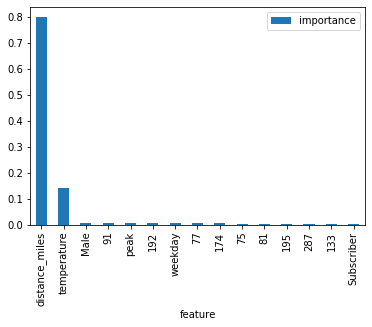

In [82]:
importances.plot.bar()

# SGD Model

In [83]:
#SGD
#Apply SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5,tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

2.97

In [84]:
print(classification_report(y_test,Y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         100       0.00      0.00      0.00       491
         103       0.00      0.00      0.00       111
         106       0.00      0.00      0.00       293
         107       0.00      0.00      0.00        88
         108       0.00      0.00      0.00        75
         109       0.00      0.00      0.00        71
         110       0.00      0.00      0.00       550
         111       0.00      0.00      0.00       227
         112       0.00      0.00      0.00       329
         113       0.00      0.00      0.00        46
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00        22
         116       0.00      0.00      0.00        25
         117       0.00      0.00      0.00        27
         118       0.00      0.00      0.00        84
         119       0.00      0.00      0.00        50
         120       0.00      0.00      0.00        35
         122       0.00    

In [85]:
print(confusion_matrix(y_test,Y_pred))

[[ 0  0  3 ...  0 28  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  0 ...  0  0  0]]


# Decision Tree Model

In [86]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

99.41

In [87]:
print(classification_report(y_test,Y_pred_dt))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         100       1.00      1.00      1.00       491
         103       1.00      1.00      1.00       111
         106       1.00      1.00      1.00       293
         107       1.00      1.00      1.00        88
         108       1.00      0.99      0.99        75
         109       1.00      0.94      0.97        71
         110       1.00      1.00      1.00       550
         111       1.00      1.00      1.00       227
         112       1.00      1.00      1.00       329
         113       1.00      0.98      0.99        46
         114       0.67      1.00      0.80         2
         115       0.95      0.95      0.95        22
         116       1.00      0.96      0.98        25
         117       0.93      0.93      0.93        27
         118       0.98      1.00      0.99        84
         119       1.00      1.00      1.00        50
         120       0.91      0.89      0.90        35
         122       0.96    

In [88]:
print(confusion_matrix(y_test,Y_pred_dt))

[[491   0   0 ...   0   0   0]
 [  0 111   0 ...   0   0   0]
 [  0   0 293 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0 329   0]
 [  0   0   0 ...   0   0  81]]


In [89]:
#distance_miles is the most important predictor, dropping this variable reduces the accuracy. in order to predict without distance, we should try other algorithms.

In [90]:
depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The mi

[(3, 0.06989888015929024), (4, 0.09397932030516484), (5, 0.14600935201831614), (6, 0.19256494217650433), (7, 0.2477748583606197), (8, 0.3081539517719813), (9, 0.37553172285384706), (10, 0.445750103302268), (11, 0.5209800065076192), (12, 0.5904364942777832), (13, 0.6530492058675836), (14, 0.7098028775663806), (15, 0.7650896885025243), (16, 0.8104315285135861), (17, 0.8462391049271704), (18, 0.8779464337207489), (19, 0.9031569276067614)]


In [91]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 300,500],
    'max_depth' : [4,5,6,7],
}

In [92]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [93]:
CV_rfc.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [94]:
rfc1=RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=7)

In [95]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:
pred_train_rfc=rfc1.predict(X_test)

In [97]:
rfc1.score(X_test,y_test)

0.2631607176379093

In [99]:
#Models without distance

In [100]:
X_no_dist=data_for_model_dummies[[ 'temperature',
              'weekday',           'peak',
            'Subscriber',           'Male',
            75,
                     77,               81,               91,              133,
                    174,              192,              195,              287]]
y=data_for_model_dummies['to_station_id']

In [101]:
scaler=StandardScaler()

In [102]:
X_no_dist_scaled=scaler.fit_transform(X_no_dist)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train_no_dist,X_test_no_dist,y_train_no_dist,y_test_no_dist=train_test_split(X_no_dist_scaled,y,random_state=100,test_size=0.3)

In [105]:
#Random Forest
rf_mod2_no_dist=rf.fit(X_train_no_dist,y_train_no_dist)

In [106]:
pred_test_no_dist=rf_mod2_no_dist.predict(X_test_no_dist)

In [107]:
print(classification_report(y_test_no_dist,pred_test_no_dist))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

         100       0.02      0.01      0.01       491
         103       0.00      0.00      0.00       111
         106       0.04      0.02      0.03       293
         107       0.00      0.00      0.00        88
         108       0.00      0.00      0.00        75
         109       0.00      0.00      0.00        71
         110       0.04      0.03      0.03       550
         111       0.01      0.00      0.01       227
         112       0.02      0.01      0.01       329
         113       0.00      0.00      0.00        46
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00        22
         116       0.00      0.00      0.00        25
         117       0.00      0.00      0.00        27
         118       0.01      0.02      0.02        84
         119       0.00      0.00      0.00        50
         120       0.00      0.00      0.00        35
         122       0.00    

In [108]:
acc_score_rf_no_dist=accuracy_score(y_test_no_dist,pred_test_no_dist)
acc_score_rf_no_dist

0.04953203357558529

In [109]:
importances = pd.DataFrame({'feature':X_no_dist.columns,'importance':np.round(rf_mod2_no_dist.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
temperature,0.833
Male,0.028
weekday,0.023
peak,0.023
195,0.012
192,0.011
75,0.010
174,0.010
77,0.009


In [110]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd_no_dist = SGDClassifier(max_iter=5,tol=None)
sgd_no_dist.fit(X_train_no_dist, y_train_no_dist)
Y_pred_no_dist = sgd_no_dist.predict(X_test_no_dist)
acc_sgd_no_dist = round(sgd_no_dist.score(X_test_no_dist, y_test_no_dist) * 100, 2)
acc_sgd_no_dist

1.42

In [111]:
print(classification_report(y_test_no_dist,Y_pred_no_dist))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         100       0.01      0.03      0.02       491
         103       0.01      0.14      0.01       111
         106       0.00      0.00      0.00       293
         107       0.00      0.00      0.00        88
         108       0.00      0.00      0.00        75
         109       0.00      0.00      0.00        71
         110       0.00      0.00      0.00       550
         111       0.00      0.00      0.00       227
         112       0.00      0.00      0.00       329
         113       0.00      0.00      0.00        46
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00        22
         116       0.00      0.00      0.00        25
         117       0.00      0.00      0.00        27
         118       0.00      0.00      0.00        84
         119       0.00      0.00      0.00        50
         120       0.00      0.00      0.00        35
         122       0.00    

In [112]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_no_dist, y_train_no_dist)
Y_pred_dt_no_dist = decision_tree.predict(X_test_no_dist)
acc_decision_tree_no_dist = round(decision_tree.score(X_test_no_dist, y_test_no_dist) * 100, 2)
acc_decision_tree_no_dist

4.85

In [113]:
print(classification_report(y_test_no_dist,Y_pred_dt_no_dist))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         100       0.02      0.03      0.03       491
         103       0.00      0.00      0.00       111
         106       0.03      0.04      0.03       293
         107       0.02      0.02      0.02        88
         108       0.00      0.00      0.00        75
         109       0.00      0.00      0.00        71
         110       0.04      0.06      0.04       550
         111       0.02      0.03      0.03       227
         112       0.02      0.02      0.02       329
         113       0.02      0.02      0.02        46
         114       0.00      0.00      0.00         2
         115       0.00      0.00      0.00        22
         116       0.00      0.00      0.00        25
         117       0.00      0.00      0.00        27
         118       0.02      0.05      0.03        84
         119       0.02      0.02      0.02        50
         120       0.00      0.00      0.00        35
         122       0.00    